In [11]:
import open3d as o3d
import cv2
from PIL import Image
from pylab import *
import matplotlib.pyplot as plt

In [12]:
R = np.float64([[7.533745e-03, -9.999714e-01, -6.166020e-04],
                [1.480249e-02, 7.280733e-04, -9.998902e-01],
                [9.998621e-01, 7.523790e-03, 1.480755e-02]])
# 先做个转置
RT = np.transpose(R)
RT

array([[ 7.533745e-03,  1.480249e-02,  9.998621e-01],
       [-9.999714e-01,  7.280733e-04,  7.523790e-03],
       [-6.166020e-04, -9.998902e-01,  1.480755e-02]])

In [13]:
# 再求罗德里德斯变换
rvec = cv2.Rodrigues(RT)[0]
rvec

array([[-1.20134994],
       [ 1.19307953],
       [-1.21012676]])

In [14]:
# 原始平移矩阵
tvec = np.mat([-4.069766e-03, -7.631618e-02, -2.717806e-01])
tvec

matrix([[-0.00406977, -0.07631618, -0.2717806 ]])

In [15]:
# # 相机内部参数
# camera_matrix = np.float64([[7.215377e+02, 0.000000e+00, 6.095593e+02, 4.485728e+01],
#                             [0.000000e+00, 7.215377e+02, 1.728540e+02, 2.163791e-01],
#                             [0.000000e+00, 0.000000e+00, 1.000000e+00, 2.745884e-03]])


In [19]:
# 相机内部参数
camera_matrix = np.float64([[7.215377e+02, 0.000000e+00, 6.095593e+02],
                            [0.000000e+00, 7.215377e+02, 1.728540e+02],
                            [0.000000e+00, 0.000000e+00, 1.000000e+00]])


In [30]:
# 相机形变矩阵
distCoeffs = np.float64([[9.999239000000e-01,9.837760000000e-03,-7.445048000000e-03,-9.869795000000e-03,9.999421000000e-01]])


In [17]:
# 读取pcd点云文件，保存为array数组
cloud = o3d.io.read_point_cloud(
    '/Users/jinxuanchen/Files_Local/Point_image_fusion/fusion_test/pcd/30_test/0000000030 - Cloud.pcd')  # 需要准备自己的pcd文件
cloud = np.asarray(cloud.points)  # 改变点云的数据类型

In [31]:
point_2d, _ = cv2.projectPoints(cloud, rvec, tvec, camera_matrix, distCoeffs)

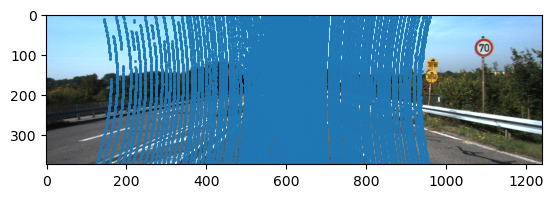

In [37]:
# 重投影绘制在图像上
im = Image.open( '/Users/jinxuanchen/Files_Local/Point_image_fusion/fusion_test/pcd/30_test/0000000030.png')
x = []
y = []

m = -1
for point in point_2d:
    m = m+1
    x_2d = point[0][0]
    y_2d = point[0][1]

    if 0 <= x_2d <= 1242 and 0 <= y_2d <= 375:
        x.append(x_2d)
        y.append(y_2d)

x = np.array(x)
y = np.array(y)
plt.scatter(x, y, s=1)
plt.imshow(im)